In [1]:
import cv2 as cv
import numpy as np
import random
from PIL import Image
from tensorflow.keras.utils import normalize
import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

seed = 42
SIZE = 256



In [17]:
seg = keras.models.load_model('unet_exe_green_seg_retrain.h5')


In [18]:
def test_on_image1(img_array, img_num, img_side_size = 256):
    
    pred = img_array[img_num]
    pred[pred>0.5] = 1
    pred[pred<0.5] = 0
    pred1 = pred.reshape(img_side_size, img_side_size)
    return pred1 

In [19]:
clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8,8))



In [26]:
root = 'D:/Work/Retinopathy/eye dataset/Diabetic Retinopathy/IDRiD/A.%20Segmentation/A. Segmentation/' 
image = os.path.join(root,'1. Original Images/b. Testing Set/IDRiD_55.jpg')
gt = os.path.join(root, '2. All Segmentation Groundtruths/b. Testing Set/3. Hard Exudates/IDRiD_55_EX.tif')


image_dataset = []
src = cv.imread(image)
_,g,_ = cv.split(src)
g_cl = clahe.apply(g)
g_cl = Image.fromarray(g)
g_cl = g_cl.resize((SIZE, SIZE))
image_dataset.append(np.array(g_cl))
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
image_dataset.shape


(1, 256, 256, 1)

In [27]:
pred = seg.predict(image_dataset)

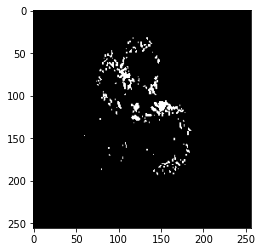

In [28]:
pred_mask = test_on_image1(pred,0)  
plt.imsave('pred_mask2.png',pred_mask, cmap = 'gray')
image =cv.imread('pred_mask2.png',0)
os.remove("pred_mask2.png")
plt.imshow(image,cmap='gray')
plt.show()

In [29]:

gt = cv.imread(gt)
_,_,r = cv.split(gt)
r = cv.resize(r, (256,256))
_,gt_th = cv.threshold(r, 250,255, cv.THRESH_BINARY)
_,pred_gt = cv.threshold(image, 250,255, cv.THRESH_BINARY)

In [30]:
intersection = np.logical_and(gt_th, pred_gt)
union = np.logical_or(gt_th, pred_gt)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.4866412213740458


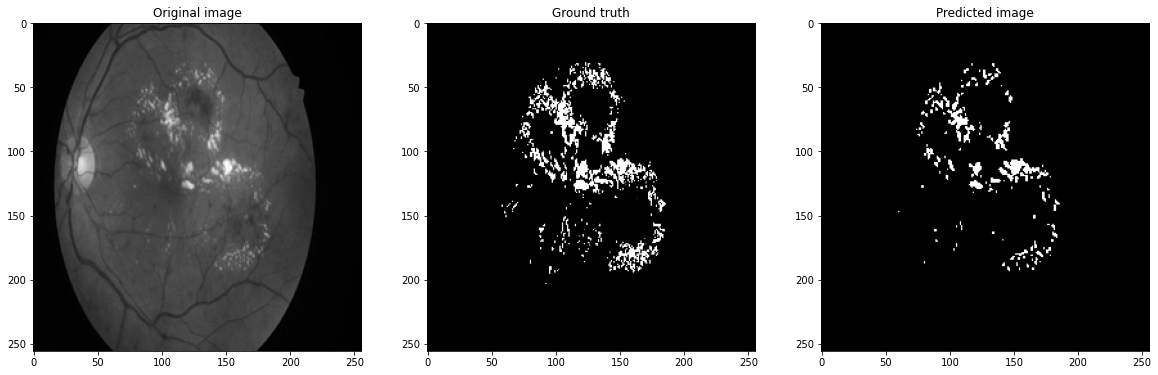

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Original image')
plt.imshow(g_cl,cmap='gray')
plt.subplot(132)
plt.title('Ground truth')
plt.imshow(r, cmap='gray')
plt.subplot(133)
plt.title('Predicted image')
plt.imshow(image, cmap='gray')
plt.show()
#cv.imshow('predicted image',image)
#cv.imshow('src image',src_256)
#cv.waitKey(0)
#cv.destroyAllWindows()